In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[14,4]

In [2]:
df=pd.read_csv('C:/Users/HP BOOK/Downloads/archive (8)/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

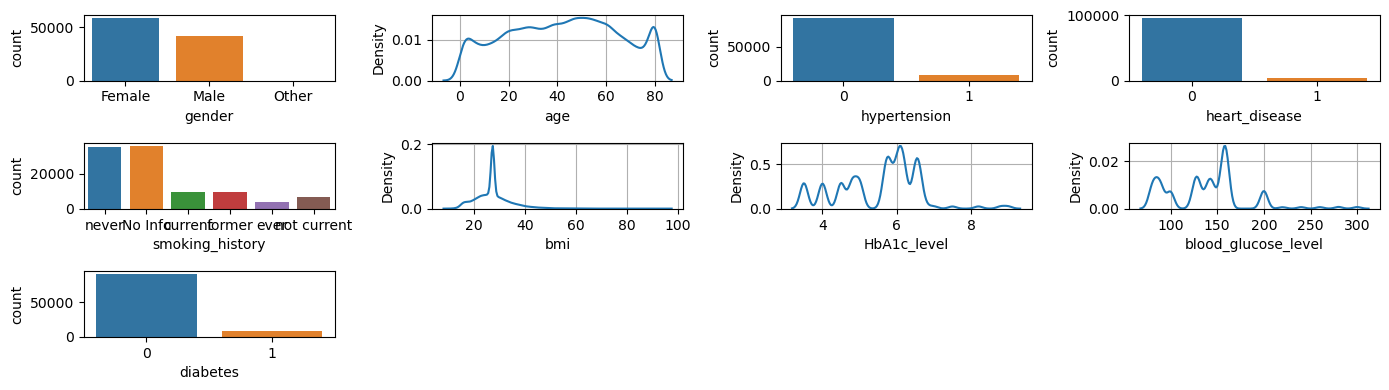

In [6]:
r=3
c=4
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    if df[i].nunique()>6:
        sns.kdeplot(df[i])
        plt.grid()
    else:
        sns.countplot(x=df[i])
    it+=1
plt.tight_layout()
plt.show()

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
import scipy.stats as stats

In [9]:
y=df['diabetes']
x=df.drop('diabetes',axis=1)

In [10]:
stat,pval,dof,obs=stats.chi2_contingency(pd.crosstab(x['gender'],y))

In [11]:
pval

7.953383718307459e-32

In [12]:
st=[]
p=[]
for i in x.columns:
   
    if x[i].nunique()<7:
        stat,pval,dof,obs=stats.chi2_contingency(pd.crosstab(x[i],df['diabetes']))
        st.append(stat)
        p.append(pval)
    else:
        a=df[df['diabetes']==0][i]
        b=df[df['diabetes']==1][i]
        stat,pval=stats.ttest_ind(a,b)
        st.append(stat)
        p.append(pval)

In [13]:
st

[143.21825102550298,
 -84.44765154890852,
 3910.708546826595,
 2945.847521829186,
 1956.0944200848764,
 -69.39822715441193,
 -138.28308350581383,
 -146.1610562407839]

In [14]:
p

[7.953383718307459e-32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [15]:
sig=pd.DataFrame({'features':x.columns,'stat':st,'pval':p})

In [16]:
sig[sig['pval']<0.05]['features'].values

array(['gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype=object)

In [17]:
x=x[['gender', 'age', 'hypertension', 'heart_disease','smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [18]:
x=pd.get_dummies(x,columns=['gender','smoking_history'],drop_first=True,dtype=int)
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


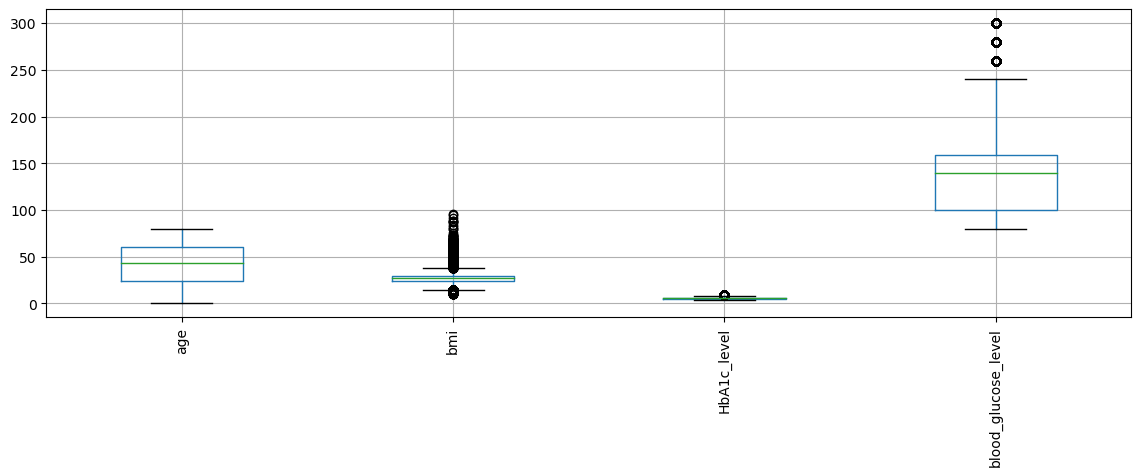

In [19]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].boxplot()
plt.xticks(rotation=90)
plt.show()

-0.1391578935995456


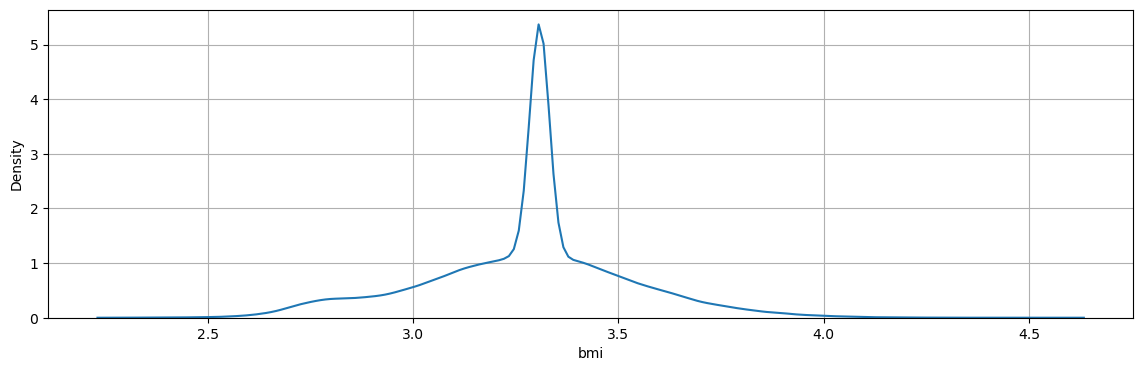

In [20]:
print(np.log(x['bmi']).skew())
sns.kdeplot(np.log(x['bmi']))
plt.grid()
plt.show()

In [21]:
x['bmi']=np.log(x['bmi'])
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,3.226447,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,3.307619,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,3.307619,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,3.154870,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,3.002708,4.8,155,1,0,1,0,0,0,0


In [22]:
x.skew()

age                            -0.051979
hypertension                    3.231296
heart_disease                   4.733872
bmi                            -0.139158
HbA1c_level                    -0.066854
blood_glucose_level             0.821655
gender_Male                     0.347954
gender_Other                   74.516591
smoking_history_current         2.805620
smoking_history_ever            4.692270
smoking_history_former          2.792186
smoking_history_never           0.624607
smoking_history_not current     3.546883
dtype: float64

In [23]:
x=x.drop('gender_Other',axis=1)
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,3.226447,6.6,140,0,0,0,0,1,0
1,54.0,0,0,3.307619,6.6,80,0,0,0,0,0,0
2,28.0,0,0,3.307619,5.7,158,1,0,0,0,1,0
3,36.0,0,0,3.154870,5.0,155,0,1,0,0,0,0
4,76.0,1,1,3.002708,4.8,155,1,1,0,0,0,0


<Axes: >

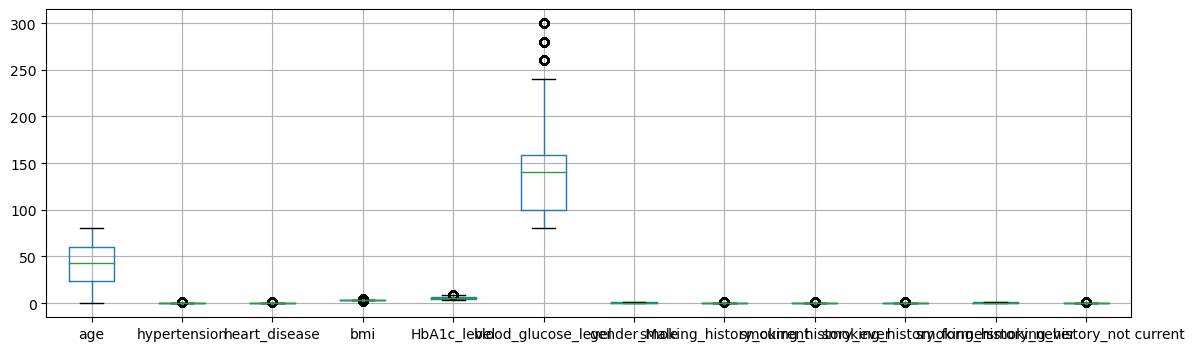

In [24]:
x.boxplot()

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mmax = MinMaxScaler()

In [27]:
x[['age','bmi', 'HbA1c_level', 'blood_glucose_level']]=mmax.fit_transform(x[['age','bmi', 'HbA1c_level', 'blood_glucose_level']])

In [28]:
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.408793,0.563636,0.272727,0,0,0,0,1,0
1,0.674675,0,0,0.444749,0.563636,0.000000,0,0,0,0,0,0
2,0.349349,0,0,0.444749,0.400000,0.354545,1,0,0,0,1,0
3,0.449449,0,0,0.377087,0.272727,0.340909,0,1,0,0,0,0
4,0.949950,1,1,0.309685,0.236364,0.340909,1,1,0,0,0,0


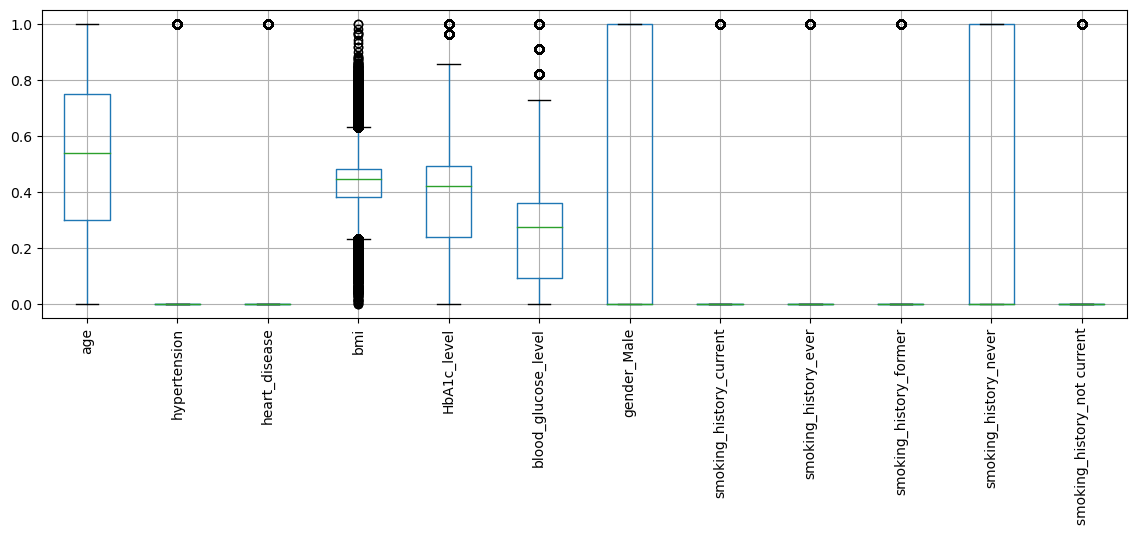

In [29]:
x.boxplot()
plt.xticks(rotation=90)
plt.show()

In [30]:
import statsmodels.api as sm

In [31]:
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.113058
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99987
Method:                           MLE   Df Model:                           12
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.6112
Time:                        21:25:30   Log-Likelihood:                -11306.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -17.4386      0.185    -94.097      0.000  

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [34]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [35]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [36]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

For the LogisticRegression()
The TRAIN accuracy is 0.9610142857142857
The ROC score for TRAIN data is 0.8097943010423239


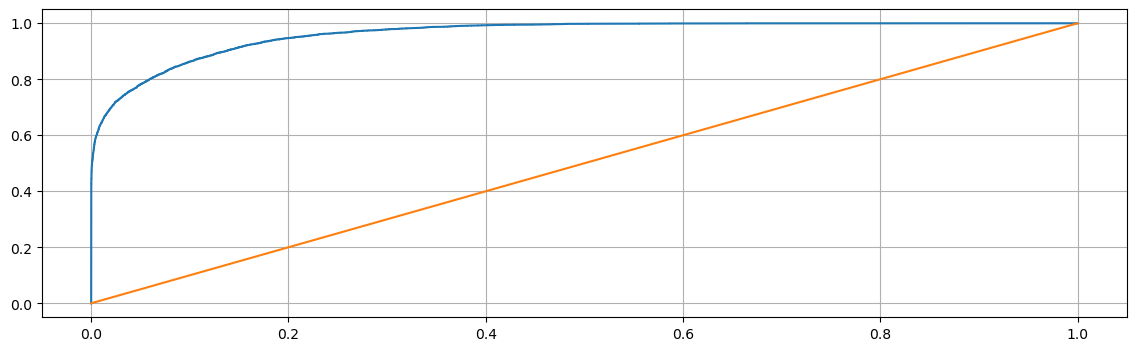

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9592333333333334
The ROC score for TEST data is 0.8012319974470126


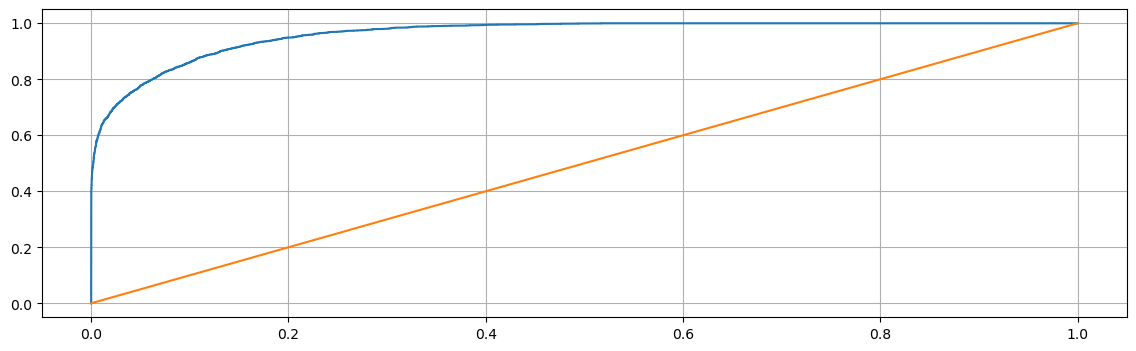

In [37]:
predictor(lr)

For the DecisionTreeClassifier()
The TRAIN accuracy is 0.9993142857142857
The ROC score for TRAIN data is 0.9959684192843945


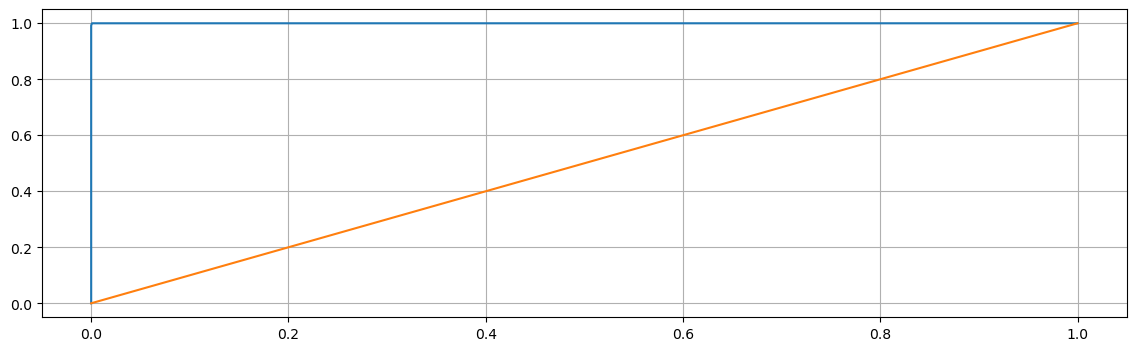

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9520666666666666
The ROC score for TEST data is 0.8527042062723155


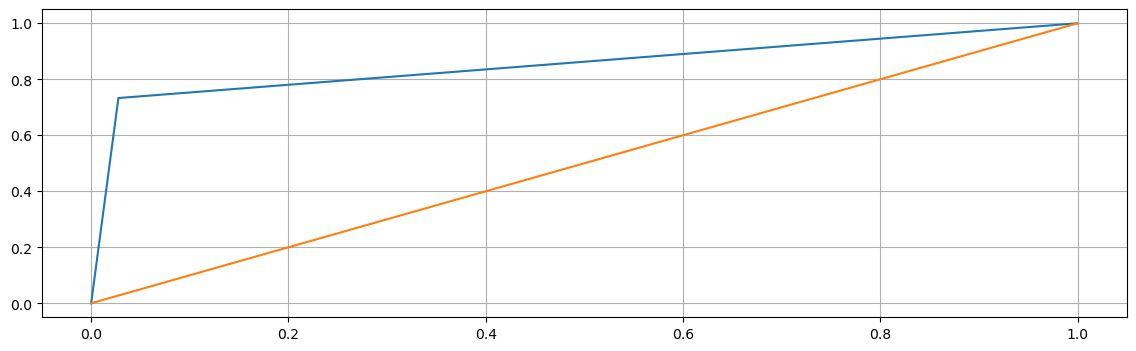

In [38]:
predictor(dt)

For the RandomForestClassifier()
The TRAIN accuracy is 0.9992714285714286
The ROC score for TRAIN data is 0.9960973679796836


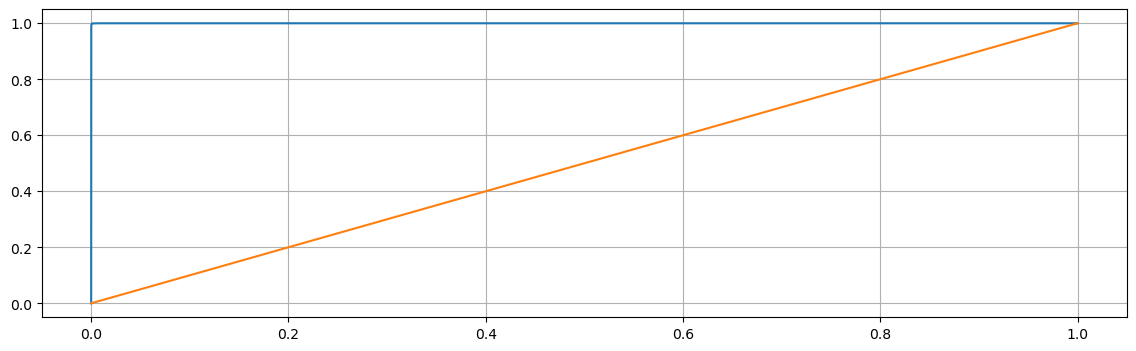

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9704333333333334
The ROC score for TEST data is 0.8397650989074507


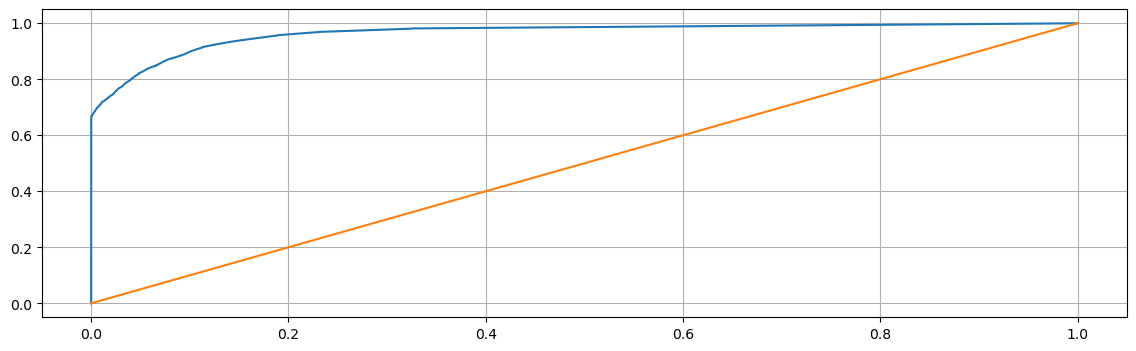

In [39]:
predictor(rf)

For the KNeighborsClassifier()
The TRAIN accuracy is 0.9691428571428572
The ROC score for TRAIN data is 0.8350347193663744


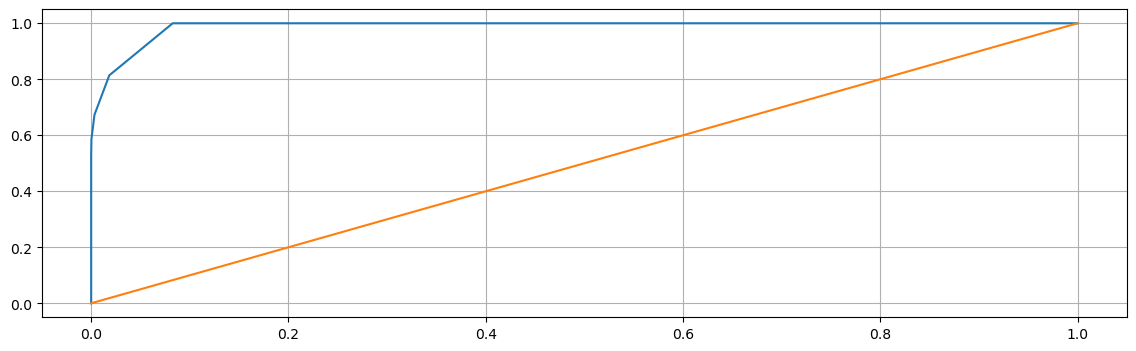

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9612666666666667
The ROC score for TEST data is 0.797356286879338


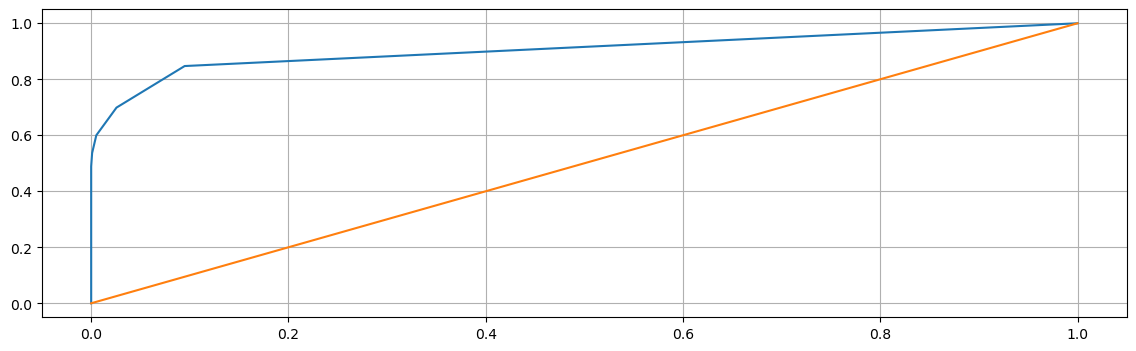

In [40]:
predictor(knn)

For the GaussianNB()
The TRAIN accuracy is 0.9037142857142857
The ROC score for TRAIN data is 0.7921183841266661


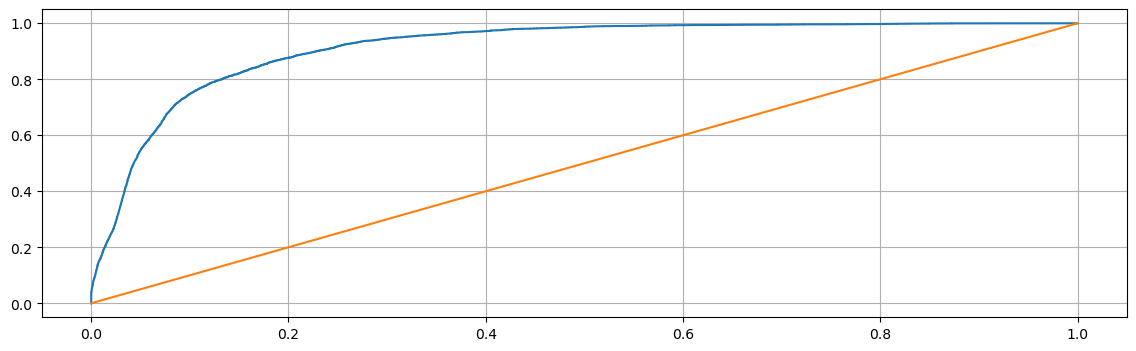

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9062
The ROC score for TEST data is 0.7882838801443152


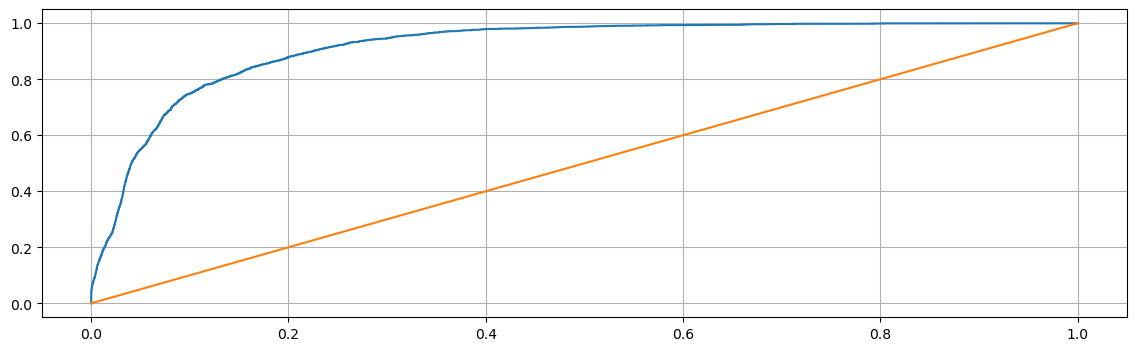

In [41]:
predictor(gnb)

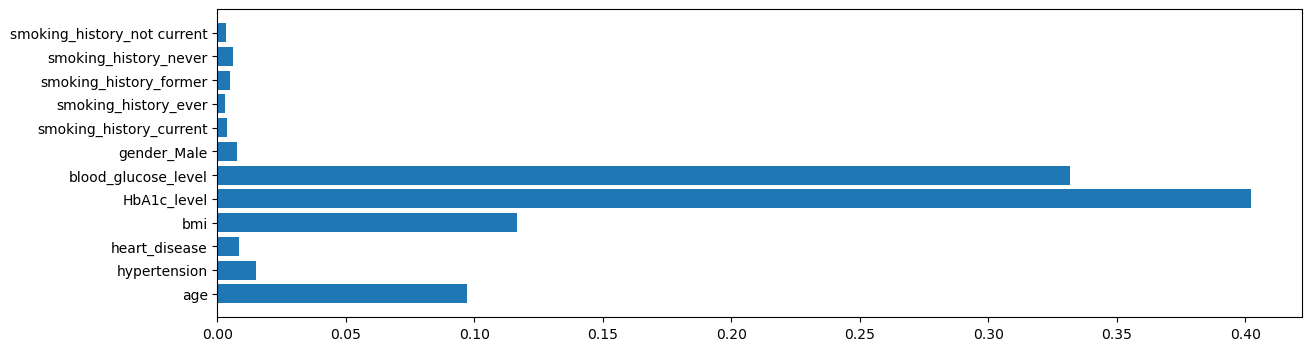

In [42]:
plt.barh(xtrain.columns,rf.fit(xtrain,ytrain).feature_importances_)
plt.show()